Experiement 1

In [1]:
# initialization
import numpy as np

# importing Qiskit
# from qiskit import IBMQ
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, quantum_info
from qiskit import ClassicalRegister, QuantumRegister

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
  m = nb-1
  k = 0

  while t > 0:
    k |= (t & 1) << m
    t >>= 1
    m -= 1

  return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb):
  newv = np.copy(v)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newv[i] = v[ni]

  return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb):
  newm = np.copy(m)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newm[i][i] = m[ni][ni]

  return newm

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

array([[-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j]])

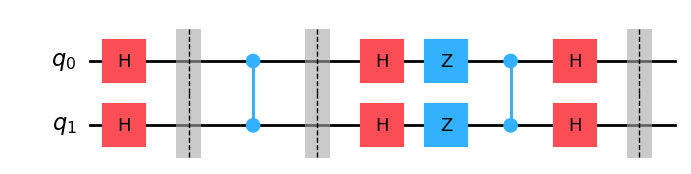

In [4]:
n = 2

def Oracle(): ## select 11
    oc = QuantumCircuit(n)

  # cz: control q0, target q1
    oc.cz(0, 1)
    display(rdm(quantum_info.Operator(oc).data,n))
    return oc

def A(): ## amplitude amplification via fliiping around the mean
    ac = QuantumCircuit(2)
    ac.h(range(2))
    ac.z(range(2))
    ac.cz(0,1)
    ac.h(range(2))
    display(rdm(quantum_info.Operator(ac).data,n))
    return ac

qc = QuantumCircuit(n)

qc.h(range(n))
qc.barrier()

# query the Oracle: phase inversion
qc.compose(Oracle(),inplace=True)
qc.barrier()

# amplitude magnification
qc.compose(A(),inplace=True)
qc.barrier()

# Draw the circuit
display(qc.draw())

# Do NOT call measure() because we want to see the probability amplitudes in the statevector
qc.save_statevector()

It matches the results
Our Final vector is [0001] which corresponds with qubit 1
The probability for each location is 0 except 11

Experiment 2

In [5]:
# initialization
import numpy as np

# importing Qiskit
# from qiskit import IBMQ
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, quantum_info
from qiskit import ClassicalRegister, QuantumRegister

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

In [6]:
# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
  m = nb-1
  k = 0

  while t > 0:
    k |= (t & 1) << m
    t >>= 1
    m -= 1

  return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb):
  newv = np.copy(v)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newv[i] = v[ni]

  return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb):
  newm = np.copy(m)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newm[i][i] = m[ni][ni]

  return newm

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

array([[-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j]])

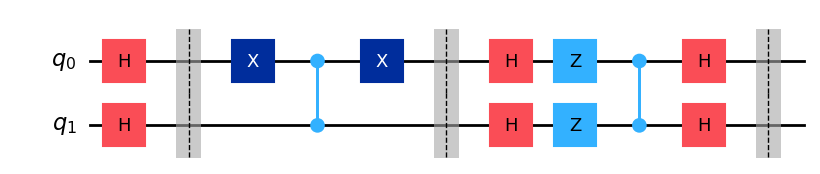

In [7]:
n = 2

def Oracle(): ## select 11
    oc = QuantumCircuit(n)

  # cz: control q0, target q1
    oc.x(0)
    oc.cz(0, 1)
    oc.x(0)
    display(rdm(quantum_info.Operator(oc).data,n))
    return oc

def A(): ## amplitude amplification via fliiping around the mean
    ac = QuantumCircuit(2)
    ac.h(range(2))
    ac.z(range(2))
    ac.cz(0,1)
    ac.h(range(2))
    display(rdm(quantum_info.Operator(ac).data,n))
    return ac

qc = QuantumCircuit(n)

qc.h(range(n))
qc.barrier()

# query the Oracle: phase inversion
qc.compose(Oracle(),inplace=True)
qc.barrier()

# amplitude magnification
qc.compose(A(),inplace=True)
qc.barrier()

# Draw the circuit
display(qc.draw())

# Do NOT call measure() because we want to see the probability amplitudes in the statevector
qc.save_statevector()

It matches the results
Our Final vector is [0100] which corresponds with qubit 01

The probability for each location is 0 except 01

Experiment 3

In [8]:
# initialization
import numpy as np

# importing Qiskit
# from qiskit import IBMQ
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, quantum_info
from qiskit import ClassicalRegister, QuantumRegister

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

In [9]:
# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
  m = nb-1
  k = 0

  while t > 0:
    k |= (t & 1) << m
    t >>= 1
    m -= 1

  return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb):
  newv = np.copy(v)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newv[i] = v[ni]

  return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb):
  newm = np.copy(m)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newm[i][i] = m[ni][ni]

  return newm

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j]])

array([[ 0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j,  0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j,  0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j,  0.75+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,  0.75+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,  0.75+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
         0.75+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j,  0.75+0.j]])

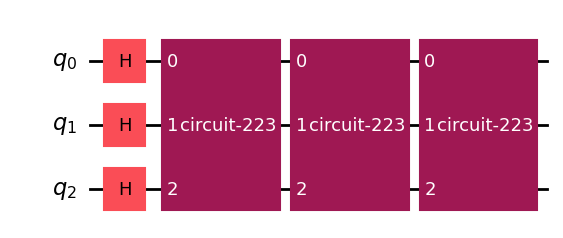

In [16]:
n = 3

def Oracle(): ## select q0 q1 q2: 111
    oc = QuantumCircuit(n)

  # use ccx and H-gates to achieve ccz
    oc.h(2)
    oc.ccx(0,1,2)
    oc.h(2)
    display(rdm(quantum_info.Operator(oc).data,n))
    return oc

def A(nb): ## amplitude amplification via fliiping around the mean
    ac = QuantumCircuit(nb)
    ac.h(range(nb))
    ac.x(range(nb))
  # Do multi-controlled-Z gate
    ac.h(nb-1)
    ac.mcx(list(range(nb-1)), nb-1) # multi-controlled
    ac.h(nb-1)
    ac.x(range(nb))
    ac.h(range(nb))
    display(rdm(quantum_info.Operator(ac).data,n))
    return ac

qc = QuantumCircuit(n)

qc.h(range(n))

# construct the Oracle_Amplication circuits
OA = QuantumCircuit(n)

# query the Oracle
OA.compose(Oracle(), inplace=True)

# amplitude magnification
OA.compose(A(n),inplace=True)

# put the OA after the H-gates
#qc.compose(OA,inplace=True)
qc.compose( OA.repeat(3), inplace=True)

# Draw the circuit
display(qc.draw())

# Do NOT call measure() because we want to see the probability amplitudes in the statevector
#display(rdm(quantum_info.Operator(qc).data,n))
qc.save_statevector()


Probability amplitudes are 0.265 and 0.088

Our Final vector is [00000001] which corresponds with qubit 111

when we increase the iteration value, the probability of getting the answer decreases

# Run on the simulator

[ 0.30935922-4.27565803e-16j  0.30935922-4.32978028e-16j
  0.30935922-4.38390253e-16j  0.30935922-4.76275831e-16j
  0.30935922-4.38390253e-16j  0.30935922-4.76275831e-16j
  0.30935922-4.70863606e-16j -0.57452426+8.01009352e-16j]
{'000': 0.095703125, '100': 0.095703125, '010': 0.095703125, '110': 0.095703125, '001': 0.095703125, '101': 0.095703125, '011': 0.095703125, '111': 0.330078125000001}


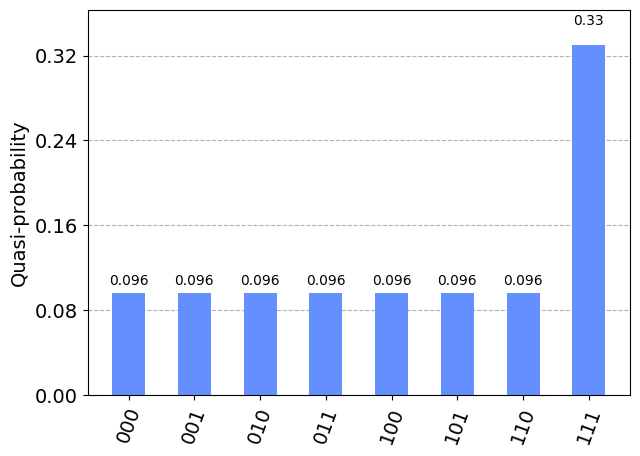

In [17]:
# Use Aer’s qasm_simulator
simulator = AerSimulator()

# compile the circuit down to low-level QASM instructions
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()
out_state = result.get_statevector()

print(rv(out_state.data,n))
counts = result.get_counts()

# we have to reverse the string in the dictionary counts
answer = {}
for str in counts:
  answer[str[::-1]] = counts[str]

print(answer)
plot_histogram(answer)

Experiment 4

In [18]:
# initialization
import numpy as np

# importing Qiskit
# from qiskit import IBMQ
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, quantum_info
from qiskit import ClassicalRegister, QuantumRegister

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

In [19]:
# reverse the bit sequence of the nb-bit integer t
def rbits(t,nb):
  m = nb-1
  k = 0

  while t > 0:
    k |= (t & 1) << m
    t >>= 1
    m -= 1

  return k

# exchange the elements in the vector v based on the reverse bits of indices
def rv(v,nb):
  newv = np.copy(v)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newv[i] = v[ni]

  return newv

# exchange the diagonal elements in the matrix m based on the reverse bits of indices
def rdm(m, nb):
  newm = np.copy(m)

  for i in range(1<<nb):
    ni = rbits(i,nb)
    newm[i][i] = m[ni][ni]

  return newm

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         1.+0.j]])

array([[ 0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j,  0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j,  0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j,  0.75+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,  0.75+0.j, -0.25+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,  0.75+0.j,
        -0.25+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
         0.75+0.j, -0.25+0.j],
       [-0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
        -0.25+0.j,  0.75+0.j]])

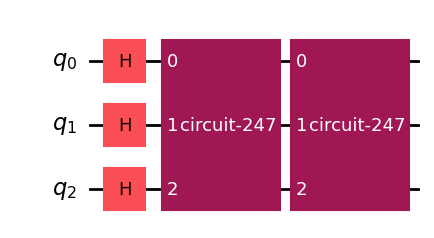

In [22]:
n = 3

def Oracle(): ## select q0 q1 q2: 111
    oc = QuantumCircuit(n)

  # use ccx and H-gates to achieve ccz
    oc.x(0)
    oc.x(1)
    oc.h(2)
    oc.ccx(0,1,2)
    oc.h(2)
    oc.x(0)
    oc.x(1)
    display(rdm(quantum_info.Operator(oc).data,n))
    return oc

def A(nb): ## amplitude amplification via fliiping around the mean
    ac = QuantumCircuit(nb)
    ac.h(range(nb))
    ac.x(range(nb))
  # Do multi-controlled-Z gate
    ac.h(nb-1)
    ac.mcx(list(range(nb-1)), nb-1) # multi-controlled
    ac.h(nb-1)
    ac.x(range(nb))
    ac.h(range(nb))
    display(rdm(quantum_info.Operator(ac).data,n))
    return ac

qc = QuantumCircuit(n)

qc.h(range(n))

# construct the Oracle_Amplication circuits
OA = QuantumCircuit(n)

# query the Oracle
OA.compose(Oracle(), inplace=True)

# amplitude magnification
OA.compose(A(n),inplace=True)

# put the OA after the H-gates
#qc.compose(OA,inplace=True)
qc.compose( OA.repeat(2), inplace=True)

# Draw the circuit
display(qc.draw())

# Do NOT call measure() because we want to see the probability amplitudes in the statevector
#display(rdm(quantum_info.Operator(qc).data,n))
qc.save_statevector()


[-0.08838835+9.74200563e-17j  0.97227182-7.79360451e-16j
 -0.08838835+3.24733521e-17j -0.08838835+8.65956056e-17j
 -0.08838835+3.24733521e-17j -0.08838835+8.65956056e-17j
 -0.08838835+1.08244507e-17j -0.08838835+4.32978028e-17j]
{'000': 0.0078125, '100': 0.0078125, '010': 0.0078125, '110': 0.0078125, '001': 0.9453125, '101': 0.0078125, '011': 0.0078125, '111': 0.0078125}


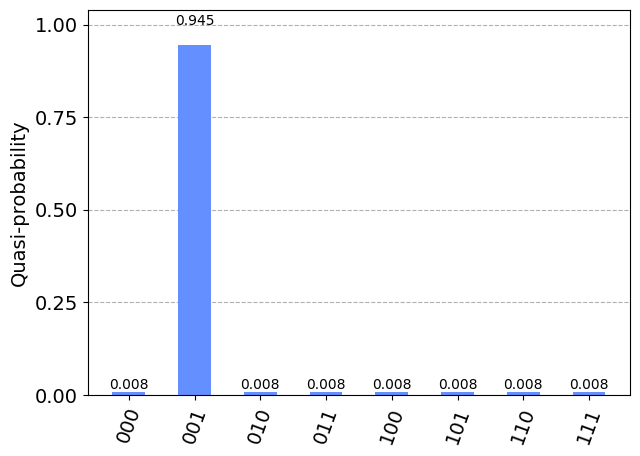

In [23]:
# Use Aer’s qasm_simulator
simulator = AerSimulator()

# compile the circuit down to low-level QASM instructions
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()
out_state = result.get_statevector()

print(rv(out_state.data,n))
counts = result.get_counts()

# we have to reverse the string in the dictionary counts
answer = {}
for str in counts:
  answer[str[::-1]] = counts[str]

print(answer)
plot_histogram(answer)

When we modify the Oracle such that it flips only the 001 state, we get the same results with experiment 3 but with the state we would like to find

# Run on the real-system

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [25]:
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy(operational=True, simulator=False)
backend.name

qiskit_runtime_service.__init__:INFO:2024-04-24 13:29:28,178: Default instance: ibm-q/open/main


'ibm_kyoto'

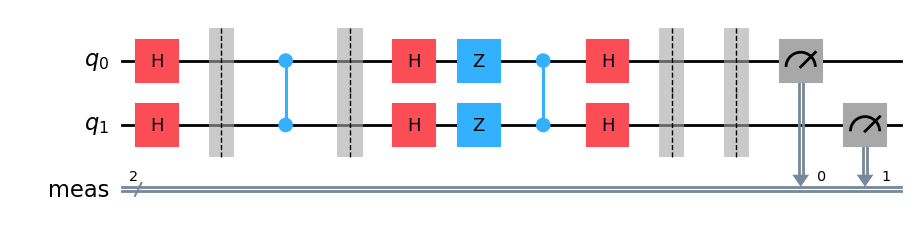

In [26]:
n = 2

def Oracle(): ## select 11
  oc = QuantumCircuit(n)

  # cz: control q0, target q1
  oc.cz(0, 1)
  return oc

def A(): ## amplitude amplification via fliiping around the mean
  ac = QuantumCircuit(2)
  ac.h(range(2))
  ac.z(range(2))
  ac.cz(0,1)
  ac.h(range(2))
  return ac

qc = QuantumCircuit(n)

qc.h(range(n))
qc.barrier()

# query the Oracle: phase inversion
qc.compose(Oracle(),inplace=True)
qc.barrier()

# amplitude magnification
qc.compose(A(),inplace=True)
qc.barrier()

qc.measure_all()

# Draw the circuit
display(qc.draw())
# qc.save_statevector()

In [27]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)

In [28]:
sampler = Sampler(backend=backend)
sampler.options.default_shots = 1000
result = sampler.run([circuit_isa]).result()

base_primitive._run:INFO:2024-04-24 13:30:02,649: Submitting job using options {'options': {'default_shots': 1000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Your current pending jobs are estimated to consume 649.5556236231932 quantum seconds, but you only have 598 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)
base_websocket_client.stream:INFO:2024-04-24 13:39:31,991: A websocket error occurred while streaming for job crmgjptx8bk0008yczt0. Connection closed with 1001.
base_websocket_client.stream:INFO:2024-04-24 13:39:31,992: Retrying get_job_status via websocket after 0.5 seconds: Attempt #1
base_websocket_client.stream:INFO:2024-04-24 13:58:43,243: A websocket error occurred while streaming for job crmgjptx8bk0008yczt0. Connection closed with 1006.
Traceback (most recent call last):
  File "/opt/conda/lib/p

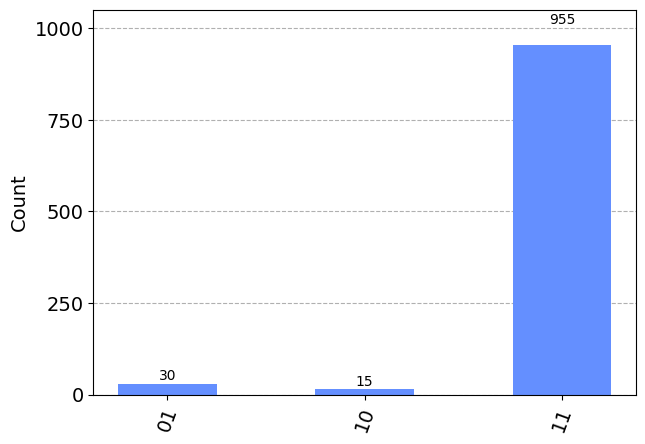

In [ ]:
dist = result[0].data.meas.get_counts()
plot_histogram(dist)

The results are different because of the noise
It used 'ibm_kyoto' which has 127 qubits with the  Eagle r3 processor